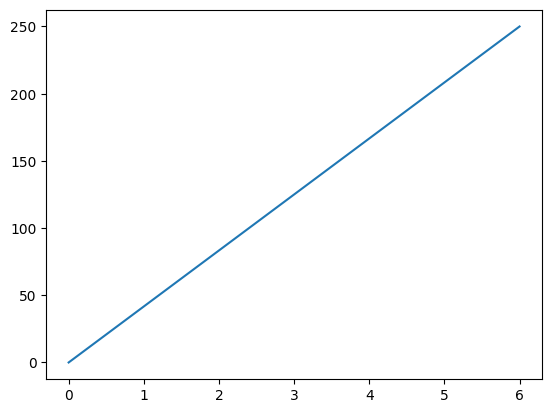

In [12]:
import matplotlib.pyplot as plt
import numpy as np

xpoints= np.array([0,6])
ypoints=np.array([0,250])

plt.plot(xpoints, ypoints)
plt.show()

In [13]:
import pandas as pd

df=pd.read_csv("email.csv")
print("head:\n",df.head())
print("\n tail: \n", df.tail())
print("\n CSV Details: \n", df.describe())


head:
   Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

 tail: 
             Category                                            Message
5568             ham               Will ü b going to esplanade fr home?
5569             ham  Pity, * was in mood for that. So...any other s...
5570             ham  The guy did some bitching but I acted like i'd...
5571             ham                         Rofl. Its true to its name
5572  {"mode":"full"                                    isActive:false}

 CSV Details: 
        Category                 Message
count      5573                    5573
unique        3                    5158
top         ham  Sorry, I'll call later
fr

In [14]:
#if null value were present
#Drop null values
df.dropna(inplace=True,axis=0) #axis= 0 means row which is default value
df.drop_duplicates(inplace =True)

In [15]:
#get distinct value from the category column
distinct_values = df['Category'].unique()
print(distinct_values)

['ham' 'spam' '{"mode":"full"']


In [16]:
distinct_counts = df.groupby('Category') ['Message'].nunique()
print(distinct_counts)

Category
ham               4516
spam               641
{"mode":"full"       1
Name: Message, dtype: int64


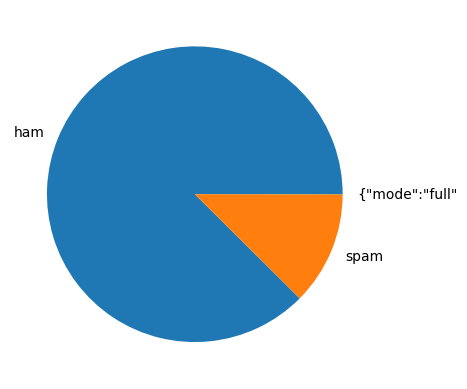

In [17]:
import matplotlib.pyplot as plt
distinct_category= distinct_counts.index.tolist()
message_count = distinct_counts.values.tolist()

fig, ax=plt.subplots()
ax.pie(message_count, labels=distinct_category)
plt.show()

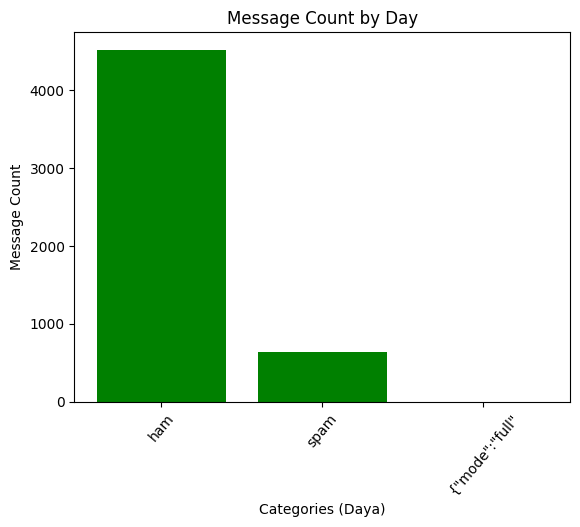

In [18]:
import matplotlib.pyplot as plt

distinct_category= distinct_counts.index.tolist()
message_count = distinct_counts.values.tolist()

#create the figure and axis
fig, ax=plt.subplots()
ax.bar(distinct_category, message_count, color ='green')

#add labels and title
ax.set_xlabel("Categories (Daya)")
ax.set_ylabel("Message Count")
ax.set_title("Message Count by Day")

plt.xticks(rotation=50) #rotates labels to avoid overlapping if there are too many

plt.show()

In [19]:
X = df["Message"]
y = df["Category"]

print(X.head())
print(y.head())

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object
0     ham
1     ham
2    spam
3     ham
4     ham
Name: Category, dtype: object


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 45)

print(X_train)

5568                 Will ü b going to esplanade fr home?
3027      I finished my lunch already. U wake up already?
2590    Join the UK's horniest Dogging service and u c...
978     Dont hesitate. You know this is the second tim...
3658             Studying. But i.ll be free next weekend.
                              ...                        
4800      I dont know why she.s not getting your messages
591     For ur chance to win a £250 wkly shopping spre...
165     BangBabes Ur order is on the way. U SHOULD rec...
5056    Am on a train back from northampton so i'm afr...
3850                                     U in town alone?
Name: Message, Length: 3610, dtype: object


In [22]:
from sklearn import tree

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(max_features = 1500)
X_train_cv = cv.fit_transform(X_train)
X_train_cv.shape
X_test_cv = cv.transform(X_test)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train_cv,y_train)
y_predict = clf.predict(X_test_cv)
print(y_predict)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


[Text(0.5, 0.875, 'x[238] <= 0.104\ngini = 0.221\nsamples = 3610\nvalue = [3153, 456, 1]'),
 Text(0.25, 0.625, 'x[1330] <= 0.063\ngini = 0.146\nsamples = 3307\nvalue = [3045, 261, 1]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1471] <= 0.163\ngini = 0.106\nsamples = 3215\nvalue = [3034.0, 180.0, 1.0]'),
 Text(0.0625, 0.125, 'gini = 0.09\nsamples = 3185\nvalue = [3034, 150, 1]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.375, 'x[1289] <= 0.032\ngini = 0.211\nsamples = 92\nvalue = [11, 81, 0]'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 15\nvalue = [9, 6, 0]'),
 Text(0.4375, 0.125, 'gini = 0.051\nsamples = 77\nvalue = [2, 75, 0]'),
 Text(0.75, 0.625, 'x[238] <= 0.186\ngini = 0.459\nsamples = 303\nvalue = [108, 195, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[797] <= 0.049\ngini = 0.229\nsamples = 190\nvalue = [25, 165, 0]'),
 Text(0.5625, 0.125, 'gini = 0.118\nsamples = 174\nvalue = [11.0, 163.0, 0.0]'),
 Text(0.68

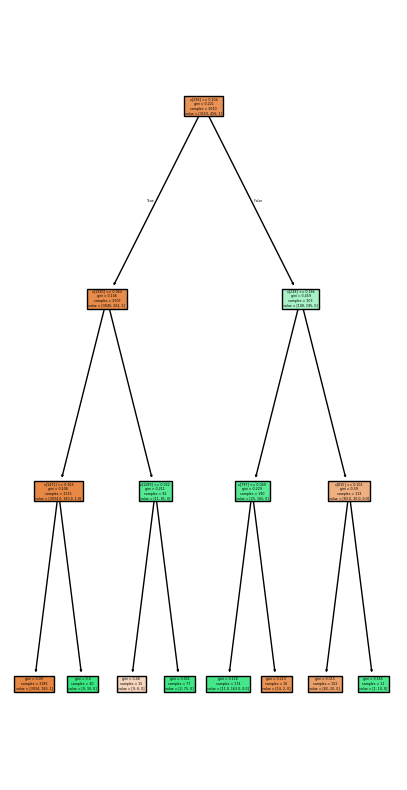

In [24]:
plt.figure(figsize = (5,10))
tree.plot_tree(clf, filled = True)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.97      1363
        spam       0.90      0.57      0.70       185

    accuracy                           0.94      1548
   macro avg       0.92      0.78      0.83      1548
weighted avg       0.94      0.94      0.93      1548



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_module import LinearRegression

#sample data
data={
    'Hours':[1,2,3,4,5],
    'Scores':[30,50,60,80,90]
}
df=pd.DataFrame(data)

#split data into input 'x' and output 'y'
x=df[['Hours']] #input->2D
y=df['Scores'] #output

#creaating and training the model
model = LinearRegression()
model.fit(X,y)

#predict score for 6 hours of study
predicted_score = model.predict([[6]])
